In [ ]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

np.random.seed(0) # Fix random number generator for reproducibility
pd.set_option('display.max_columns', None) # Display all columns in pandas

In [ ]:
# Load Datasets
file1 = "gmm.csv"
file2 = "swissroll.csv"
try:
    # Executes if running in Google Colab
    from google.colab import drive
    drive.mount('gdrive/')
    path = "gdrive/My Drive/Colab Notebooks" # CHANGE PATH TO LOCATION IF NECESSARY
except:
    # Executes if running locally (e.g. Anaconda)
    path = "./"

gmm = pd.read_csv(path + '/' + file1, usecols=["X_1", "X_2"])
swiss = pd.read_csv(path + '/' + file2, usecols=["X_1", "X_2"])

Drive already mounted at gdrive/; to attempt to forcibly remount, call drive.mount("gdrive/", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The silhouette score of the gmm data is 0.52


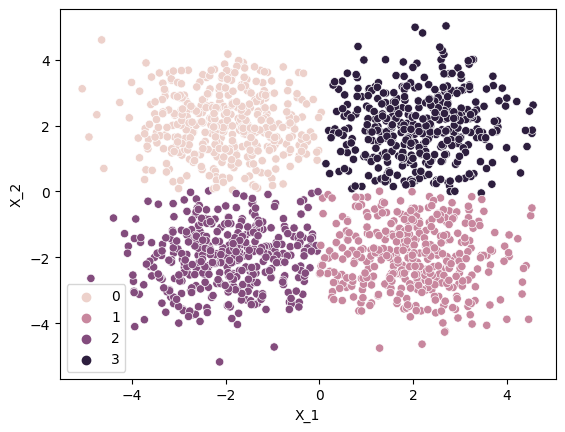

In [ ]:
# GMM
gmm_clusters = KMeans(n_clusters = 4).fit(gmm.to_numpy()) # Data already has clear quadrant clusters, hence n_clusters = 4
sns.scatterplot(data = gmm, x = 'X_1', y = 'X_2', hue = gmm_clusters.labels_)
gmm_acc = silhouette_score(gmm.to_numpy(), gmm_clusters.labels_, metric='euclidean')
print(f'The silhouette score of the gmm KMeans data is {gmm_acc:.02f}')

The silhouette score for n_clusters = 2 is 0.29
The silhouette score for n_clusters = 3 is 0.31
The silhouette score for n_clusters = 4 is 0.32
The silhouette score for n_clusters = 5 is 0.37
The silhouette score for n_clusters = 6 is 0.38
The silhouette score for n_clusters = 7 is 0.38
The silhouette score for n_clusters = 8 is 0.37
The silhouette score for n_clusters = 9 is 0.31
The silhouette score for n_clusters = 10 is 0.31
The silhouette score for n_clusters = 11 is 0.32
The silhouette score for n_clusters = 12 is 0.33
The optimal number of clusters for the swissroll data is 6
The silhouette score of the swissroll KMeans data is 0.38


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


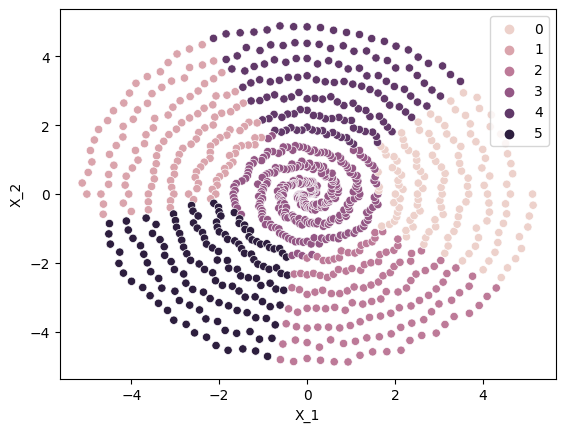

In [51]:
# Swiss KMeans
import warnings

## Cluster number is less clear with swissroll data as it resembles a spiral
## To determine the optimal number of clusters, multiple values will be tested starting from the minimum (2).
test_Ns = np.linspace(2, 12, 11, dtype = int)
silhouettes = np.zeros(11)
swiss_np = swiss.to_numpy()
for i in range(11):
  with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    swiss_clusters = KMeans(n_clusters = test_Ns[i]).fit(swiss_np)
    silhouettes[i] = silhouette_score(swiss_np, swiss_clusters.labels_, metric='euclidean')
    print(f'The silhouette score for n_clusters = {test_Ns[i]} is {silhouettes[i]:.02f}')
opt_N = test_Ns[np.argmax(silhouettes)]
print(f'The optimal number of clusters for the swissroll data is {opt_N}')

## Final Swiss KMeans
swiss_cluster = KMeans(n_clusters = opt_N).fit(swiss_np)
sns.scatterplot(data = swiss, x = 'X_1', y = 'X_2', hue = swiss_cluster.labels_)
swiss_acc = silhouette_score(swiss_np, swiss_cluster.labels_, metric='euclidean')
print(f'The silhouette score of the swissroll KMeans data is {swiss_acc:.02f}')

### Performance
To quantify clustering, I used silhouette scoring, which is the standard metric for KMeans. It is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). The ideal score is 1.0, and the worst case is -1.0.

KMeans performed well for the gmm data. Since the silhouette score is between 0.5 and 1.0, the clustering for the gmm data is reasonable.  

KMeans performed adequately for the swiss data. Since the silhouette score is less than 0.5 but still positive, the clustering for the swissroll data is relatively weak.

### Future Optimization
To improve clustering performance, multiple techniques can be utilized.
<br>
1. One of the main factors that affect the performance of K-means clustering is how the initial cluster centers are chosen. If they are too close to each other, or too far from the actual data clusters, the algorithm may take longer to converge, or even get stuck in a local optimum. A common way to avoid this problem is to use the K-means++ algorithm, which selects the initial centers based on a probability distribution that favors points that are far from each other. This can reduce the number of iterations and improve the quality of the final clusters. To use K-means++ in Python, you can simply set the init parameter to 'k-means++' when calling KMeans.
2. Another factor that can affect the performance of K-means clustering is the scale of the data features. If some features have much larger or smaller values than others, they may dominate the distance calculation and distort the cluster formation. To avoid this, it is recommended to scale your data to a common range, such as 0 to 1, or to a standard distribution, such as mean 0 and standard deviation 1. This can make the clusters more balanced and meaningful. To scale your data in Python, you can use StandardScaler or MinMaxScaler sklearn.preprocessing, and apply them to your data before passing it to KMeans.
3. The standard algorithm for K-means clustering is the Lloyd's algorithm, which iteratively assigns each data point to the nearest cluster center, and updates the cluster centers as the mean of the assigned points. However, this algorithm can be slow for large datasets, as it requires computing the distance between each point and each center in every iteration. A faster alternative is the Elkan's algorithm, which uses the triangle inequality to reduce the number of distance calculations, and keeps track of the lower and upper bounds of the distances. This algorithm can speed up the convergence and reduce the computational cost of K-means clustering. To use Elkan's algorithm in Python, you can set the algorithm parameter to 'elkan' when calling KMeans.
4. One of the challenges of K-means clustering is how to choose the optimal number of clusters for your data. If you choose too few clusters, you may lose some important information and patterns. If you choose too many clusters, you may overfit the data and create meaningless groups. A common way to evaluate your clusters is to use the elbow method, which plots the sum of squared distances (SSE) of the data points to their cluster centers as a function of the number of clusters. The optimal number of clusters is usually where the plot bends, or forms an elbow. Another common method is to use silhouette scores, which were employed here. To use the elbow method and the silhouette score in Python, you can use the inertia_ attribute and the silhouette_score function from sklearn.cluster.
5. The final tip to improve the speed and efficiency of K-means clustering is to experiment with different parameters and see how they affect the results. For example, the n_init parameter controls how many times the algorithm is run with different initial centers, and a higher value can increase the chance of finding a better solution, but also increase the running time. The max_iter parameter controls how many iterations the algorithm performs before stopping, and a higher value can improve the convergence, but also increase the computational cost. Additionally, the tol parameter controls the tolerance for the change in SSE between iterations and a lower value can make the algorithm more precise, but also more prone to overfitting. Lastly, you can use random_state to control the seed for the random number generator; a fixed value can make the results reproducible, but also less diverse. Python users can employ GridSearchCV or RandomizedSearchCV classes from sklearn.model_selection to experiment with different parameters and find the best combination for their data and objective.
<br>

[Source](https://www.linkedin.com/advice/1/how-do-you-improve-speed-efficiency-k-means-clustering#:~:text=Choose%20a%20smart%20initialization,stuck%20in%20a%20local%20optimum.)